# Scenario Discovery with PCA-PRIM on 2D Barbell (λ = 0.05)

## Imports

In [1]:
import matplotlib.pyplot as plt
from ema_workbench.analysis.prim import Prim
from src.load_shapes import load_shape_dataset
from E_hhcart_d_vs_established_methods_on_synthetic_data.visualisation_prim_cart_pca_prim.box_plotter import plot_boxes
from E_hhcart_d_vs_established_methods_on_synthetic_data.visualisation_prim_cart_pca_prim.pca_preprocess_local import pca_preprocess

## Load and Show Benchmark Problem

 We load the 2D Barbell benchmark problem with boundary noise λ = 0.05.

In [2]:
# Load and unpack a specific dataset
dataset_name = "barbell_2d_label_noise_005"
X, y = load_shape_dataset(folder_name="shapes")[dataset_name]


Loaded 32 paired datasets: ['barbell_2d_label_noise_000', 'barbell_3d_label_noise_000', 'radial_segment_2d_label_noise_000', 'radial_segment_3d_label_noise_000', 'rectangle_2d_label_noise_000', 'saddle_3d_label_noise_000', 'sine_wave_2d_label_noise_000', 'star_2d_label_noise_000', 'barbell_2d_label_noise_003', 'barbell_3d_label_noise_003', 'radial_segment_2d_label_noise_003', 'radial_segment_3d_label_noise_003', 'rectangle_2d_label_noise_003', 'saddle_3d_label_noise_003', 'sine_wave_2d_label_noise_003', 'star_2d_label_noise_003', 'barbell_2d_label_noise_005', 'barbell_3d_label_noise_005', 'radial_segment_2d_label_noise_005', 'radial_segment_3d_label_noise_005', 'rectangle_2d_label_noise_005', 'saddle_3d_label_noise_005', 'sine_wave_2d_label_noise_005', 'star_2d_label_noise_005', 'barbell_2d_label_noise_007', 'barbell_3d_label_noise_007', 'radial_segment_2d_label_noise_007', 'radial_segment_3d_label_noise_007', 'rectangle_2d_label_noise_007', 'saddle_3d_label_noise_007', 'sine_wave_2d_

Before applying PCA and PRIM, we first visualise the input dataset to understand its geometric structure and the location of the class 1 points that PCA + PRIM will aim to capture.

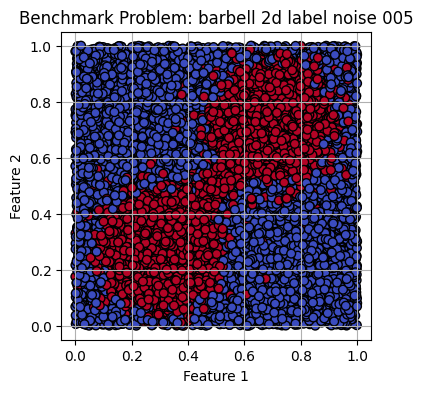

In [3]:
# Plot the dataset
plt.figure(figsize=(4, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f"Benchmark Problem: {dataset_name.replace('_', ' ')}")
plt.grid(True)
plt.show()

## PCA Preprocessing

In [4]:
rotated_X, rotation_matrix, X_mean, X_std = pca_preprocess(X, y)

## Configure PRIM Parameters

In [5]:
# PRIM configuration
mass_min = 0.05        # Minimum fraction of total data required in each valid box
threshold = 0.8        # Required density: only boxes with density >= 0.8 are accepted
peel_alpha = 0.05      # Fraction of mass removed at each peel step (controls peeling speed)
paste_alpha = 0.05     # Fraction of mass added back during pasting (controls pasting sensitivity)

## Set-Up PCA-PRIM

We initialise PCA-PRIM with the *Guivarch update function* (`update_function='guivarch'`), following the approach of Guivarch et al. (2016).  

In [6]:
# Train PRIM
prim_pca = Prim(
    rotated_X,
    y,
    threshold=threshold,
    peel_alpha=peel_alpha,
    paste_alpha=paste_alpha,
    mass_min=mass_min,
    update_function='guivarch',
)

## Finding the First Box
First let us run the algorithm to identify the first box.

In [7]:
box1 = prim_pca.find_box()

### Visualise Coverage-Density Trade-off (First Box)

The trade-off plot visualises candidate boxes found by PRIM along the coverage-density trade-off.
This plot is the primary tool for selecting which box to retain.

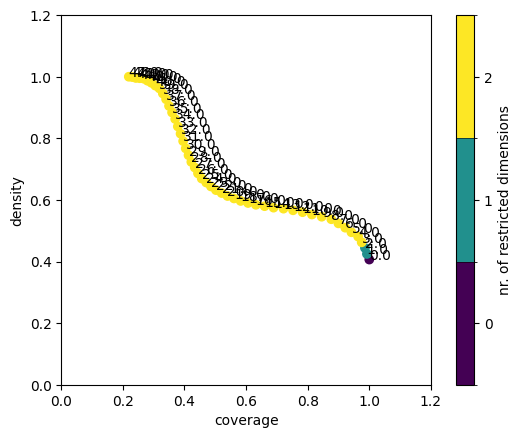

In [8]:
# Visualize the trade-off between coverage and density
box1.show_tradeoff(annotated=True)
plt.show()

The **trade-off plot** seems to show exactly the same as the PRIM trade-off plot, so read there.


### List of Candidate Boxes

To support this selection, we next print the full peeling trajectory too.  
This is useful because the trade-off plots annotate creates overlapping labels.  
We will use this table to select which box to keep based on its coverage and density value.

In [9]:
# Show a table of the peeling trajectory
box1.peeling_trajectory

,coverage,density,id,k,mass,mean,n,res_dim
0,1.000000,0.406400,0,4064,1.0000,0.406400,10000,0
1,0.992372,0.424526,1,4033,0.9500,0.424526,9500,1
2,0.985974,0.443989,2,4007,0.9025,0.443989,9025,1
3,0.975394,0.462382,3,3964,0.8573,0.462382,8573,2
4,0.963829,0.480968,4,3917,0.8144,0.480968,8144,2
5,0.942175,0.494959,5,3829,0.7736,0.494959,7736,2
6,0.921998,0.509865,6,3747,0.7349,0.509865,7349,2
7,0.899852,0.523850,7,3657,0.6981,0.523850,6981,2
8,0.876722,0.537325,8,3563,0.6631,0.537325,6631,2
9,0.845472,0.545483,9,3436,0.6299,0.545483,6299,2


### Select First Box

Based on the coverage-density trade-off plot and the printed list of candidate boxes, we select **Box 37** as the first retained box.

- It achieves a **coverage of ≈ 0.34**, which is consistent with the expectation that each bell in the Barbell shape contains ≈ 30-40% of the class 1 points.
- It also achieves a **density of ≈ 0.93**, indicating that the box is quite pure.
- Boxes with higher coverage (further right on the plot) suffer from rapidly decreasing density, as they must include parts of both bells and the handle, reducing interpretability.

We, just like with Prim, now select Box 37 as our first box:


In [10]:
# Box 37 is chosen based on the plot above
best_box_index_1 = 37

### Inspect Selected Box

We now inspect the contents of the selected box (Box 37) in more detail:

- The **box inspection plot** shows the numerical constraints on each restricted input dimension (here: the two spatial features).
- The **pairwise scatter plot** visualises how the selected box covers the target class in the 2D input space.

Together, these visualisations allow us to verify whether the box indeed isolates one of the Barbell's circular regions, with minimal overlap onto the other bell or the connecting handle.

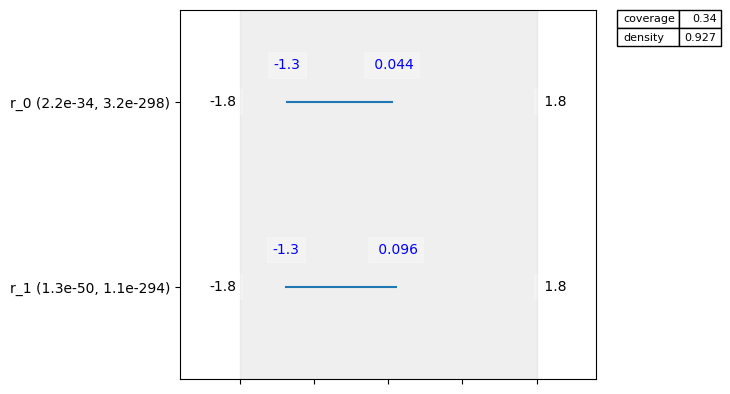

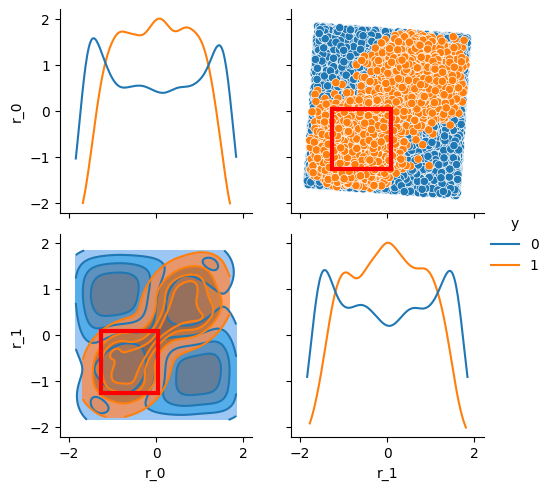

In [11]:
# Show box inspection plot
box1.inspect(best_box_index_1, style="graph")
plt.show()

# Show pairwise scatter plot for the best PRIM box
box1.show_pairs_scatter(i=best_box_index_1)
plt.show()

### Interpretation of Selected Box

The selected box (Box 37) successfully isolates the **bottom-left circular region** of the Barbell shape:

- The pairwise scatter plot clearly shows that the box bounds enclose the upper right cluster of class 1 points.
- Importantly, the box avoids extending into the left bell or the narrow handle region, which would have reduced density.

This result is fully consistent with the geometry of the benchmark problem. Since the Barbell consists of **two separate target regions**, we next proceed to search for a **second box** to capture the remaining target region (top-right bell).

## Finding the Second Box

We now run PRIM again to identify a second box.  
Because we used the *Guivarch update function*, the first box already excluded the class 1 points it covered.

This means that the second call to `find_box()` will target the remaining class 1 points, in this case, the **top-right bell** of the Barbell shape.


In [12]:
# Find second box
box2 = prim_pca.find_box()

### Visualise Coverage-Density Trade-off (Second Box)

We again inspect the coverage-density trade-off to select a suitable box.

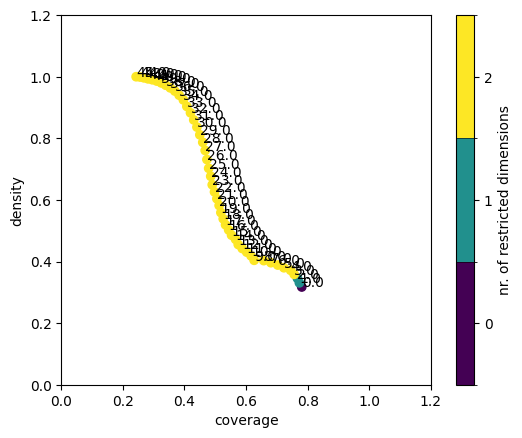

,coverage,density,id,k,mass,mean,n,res_dim
0,0.780758,0.317300,0,3173,1.0000,0.317300,10000,0
1,0.773130,0.330737,1,3142,0.9500,0.330737,9500,1
2,0.766732,0.345263,2,3116,0.9025,0.345263,9025,1
3,0.756152,0.358451,3,3073,0.8573,0.358451,8573,2
4,0.744587,0.371562,4,3026,0.8144,0.371562,8144,2
5,0.722933,0.379783,5,2938,0.7736,0.379783,7736,2
6,0.702756,0.388624,6,2856,0.7349,0.388624,7349,2
7,0.680610,0.396218,7,2766,0.6981,0.396218,6981,2
8,0.657480,0.402956,8,2672,0.6631,0.402956,6631,2
9,0.626230,0.404032,9,2545,0.6299,0.404032,6299,2


In [13]:
# Visualize the trade-off between coverage and density for box2
box2.show_tradeoff(annotated=True)
plt.show()

# Show a table of the peeling trajectory
box2.peeling_trajectory

### Select Second Box

Based on the second trade-off plot and the printed list of candidate boxes, we select **Box 37** again as the best candidate:

- The box achieves a high **density (~0.96)** and moderate **coverage (~0.35)**, consistent with the remaining target region.
- As with the first box, higher coverage values degrade density due to the handle or scattered points.

We now select Box 37 as our second retained box.

In [14]:
# Box 37 is chosen based on the plot above
best_box_index_2 = 37

### Inspect Selected Second Box

We next inspect Box 37 from the second PRIM run to verify that it correctly captures the remaining target region (top-right bell).

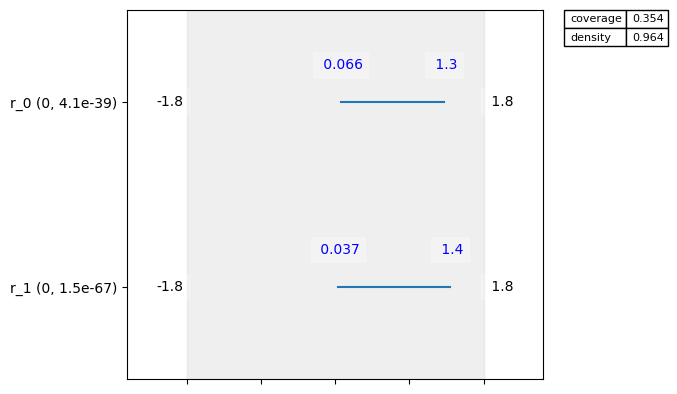

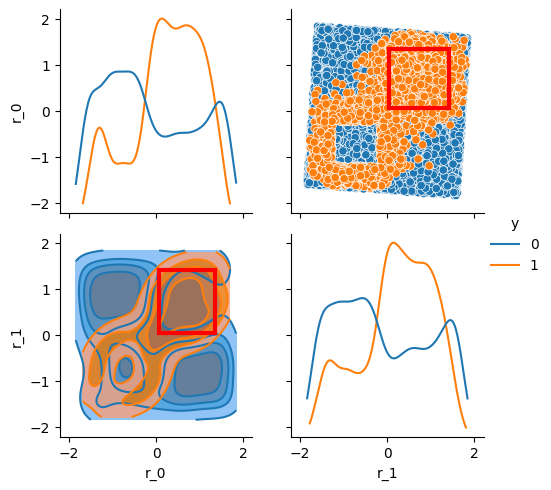

In [15]:
# Show box inspection plot
box2.inspect(best_box_index_2, style="graph")
plt.show()

# Show pairwise scatter plot for the best PRIM box
box2.show_pairs_scatter(i=best_box_index_2)
plt.show()

### Interpretation of Selected Second Box

The selected second box (Box 37) successfully isolates the **top-right circular region** of the Barbell shape:

- The pairwise scatter plot shows that the box bounds enclose the lower left cluster of class 1 points.
- There is minimal leakage into the upper bell or the handle.

## Finding the Third Box

Finally, we run PRIM a third time to see if a **third box** can further improve total coverage.

At this stage:

- The two bells have been mostly covered.
- Remaining target points (class 1) are likely located in the **handle region** or are scattered near the boundaries.

If a third box is identified with acceptable density, it can optionally be added to improve completeness of the scenario set.

In [16]:
# Find third box
box3 = prim_pca.find_box()

### Visualise Coverage-Density Trade-off (Third Box)

We now inspect the coverage-density trade-off to evaluate whether a third box can still be meaningfully retained.

Based on the problem’s geometry and prior results, we expect that after covering approximately **70%** of the target class with two high-density boxes, the remaining points will be primarily located in the narrow handle region of the Barbell or scattered near the noisy edges of the circular regions. These residual points are sparse and often intermixed with class 0 observations, making it challenging to isolate a coherent and pure additional box.

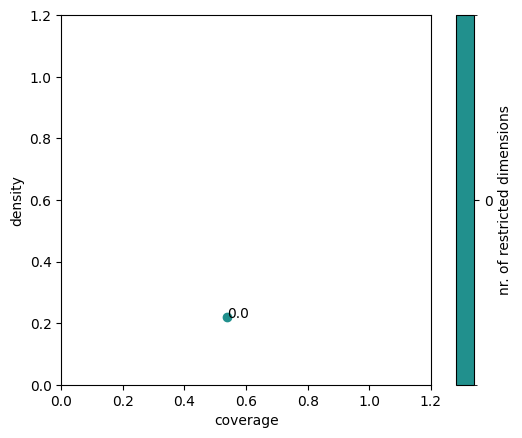

,coverage,density,id,k,mass,mean,n,res_dim
0,0.537648,0.2185,0,2185,1.0,0.2185,10000,0


In [17]:
# Visualize the trade-off between coverage and density for box3
box3.show_tradeoff(annotated=True)
plt.show()

# Show a table of the peeling trajectory
box3.peeling_trajectory

## Interpretation of Third Box Attempt

In practice, the trade-off plot and peeling trajectory confirm that **no third box meeting the minimum density threshold of 0.8 and minimum mass threshold of 5% was found**. The remaining target points are too dispersed and mixed with non-target points to form a sufficiently large and pure box.

This outcome reflects the intrinsic structure of the Barbell benchmark: the two previously selected boxes effectively capture the core target regions (the two “bells”). Attempting to add more boxes would mainly include noisy or ambiguous regions, thereby reducing interpretability.

Therefore, retaining two well-chosen boxes provides a clear and meaningful scenario description for this problem. Including additional boxes risks lowering the clarity and practical utility of the scenario discovery.

# Box Evaluation

In [18]:
# Load and unpack a specific dataset
dataset_name = "barbell_2d_label_noise_005"
X, y = load_shape_dataset(folder_name="shapes")[dataset_name]


Loaded 32 paired datasets: ['barbell_2d_label_noise_000', 'barbell_3d_label_noise_000', 'radial_segment_2d_label_noise_000', 'radial_segment_3d_label_noise_000', 'rectangle_2d_label_noise_000', 'saddle_3d_label_noise_000', 'sine_wave_2d_label_noise_000', 'star_2d_label_noise_000', 'barbell_2d_label_noise_003', 'barbell_3d_label_noise_003', 'radial_segment_2d_label_noise_003', 'radial_segment_3d_label_noise_003', 'rectangle_2d_label_noise_003', 'saddle_3d_label_noise_003', 'sine_wave_2d_label_noise_003', 'star_2d_label_noise_003', 'barbell_2d_label_noise_005', 'barbell_3d_label_noise_005', 'radial_segment_2d_label_noise_005', 'radial_segment_3d_label_noise_005', 'rectangle_2d_label_noise_005', 'saddle_3d_label_noise_005', 'sine_wave_2d_label_noise_005', 'star_2d_label_noise_005', 'barbell_2d_label_noise_007', 'barbell_3d_label_noise_007', 'radial_segment_2d_label_noise_007', 'radial_segment_3d_label_noise_007', 'rectangle_2d_label_noise_007', 'saddle_3d_label_noise_007', 'sine_wave_2d_

Figure saved: pca_prim_boxes_on_barbell_2d.pdf


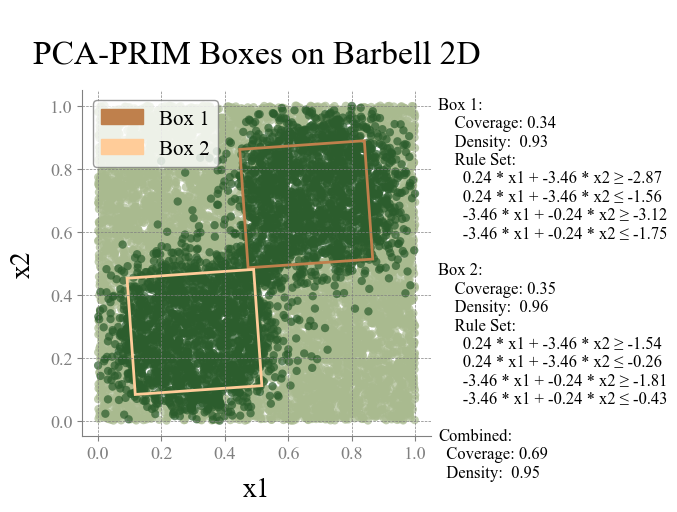

<Axes: title={'center': 'PCA-PRIM Boxes on Barbell 2D'}, xlabel='x1', ylabel='x2'>

In [19]:
# For PCA-PRIM box1:
rotation_feature_names = list(box1.box_lims[0].columns)

plot_boxes(
    boxes=(box1, box2),
    selected_indices=[best_box_index_1, best_box_index_2],
    X=X,
    y=y,
    rotation_matrix=rotation_matrix,
    X_mean=X_mean,
    X_std=X_std,
    title="PCA-PRIM Boxes on Barbell 2D",
    save_path="pca_prim_boxes_on_barbell_2d.pdf"
)